In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## ID particulas a z = 0 Gasoline

In [26]:
import pynbody

path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'
s = pynbody.load(path + '1024/WMAP3.CLUES.HR.001024')
h = s.halos()


In [2]:
import pynbody

path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'
s = pynbody.load(path + '1024/WMAP3.CLUES.HR.001024')
h = s.halos()

vector = (1,2,3) #!!!!!OJO!!! CAMBIE EL 4 POR UN 3!!!!!

vector2 = ('M31', 'MW', 'M33')
path2 = '/z/omarioni/Barras_GdGs/erebos/pyprogram/_data/'

for i in range(0,1):
    h1 = h[vector[i]]

    r200  = h1.properties['Rvir']
    IDs   = h1.star['iord']
    tform = h1.star['tform'].in_units('Gyr')

    cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')

    rgal = 0.15*r200

    xstr=((h1.star['pos'].in_units('kpc'))[:,0] - cen_pot[0])
    ystr=((h1.star['pos'].in_units('kpc'))[:,1] - cen_pot[1])
    zstr=((h1.star['pos'].in_units('kpc'))[:,2] - cen_pot[2])
     
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)    
    
    limit, = np.where(rstr<rgal)
    
    rn = rstr[limit]
    ID = IDs[limit]
    tf = tform[limit]

    data = np.zeros([len(rn),3])
    data[:,0]= ID
    data[:,1]= rn
    data[:,2]= tf


    np.savetxt(path2 + str('%s'%vector2[i])+'_tform_z0.dat', data, 
               fmt=('%15d','%12.6f','%12.6f'))

/z/omarioni/miniconda2/lib/python2.7/site-packages/pynbody/array.py:864: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


## Distancias de las particulas en tform

In [2]:
from joblib import Parallel, delayed
import numpy as np
import pynbody

#------------------------------------------------------------------------
vector2 = ('M31', 'MW', 'M33')

path2 = '/z/omarioni/Barras_GdGs/erebos/pyprogram/_data/'

path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'


for l in range(0,1):
    
    file = np.loadtxt(path2 + str('%s'%vector2[l]) +'_tform_z0.dat')
    # file = np.loadtxt(path2 + 'M33_tform_z0_2.dat')
    ID    = file[:,0]
    tform = file[:,2]

    sort = np.argsort(tform)

    sort_tform = tform[sort][::-1]
    sort_ID    = ID[sort][::-1]

#     file2 = np.loadtxt(path2 + 'M33_masscenter.dat')
    file2 = np.loadtxt(path2 + str('%s'%vector2[l]) +'_masscenter.dat')
    
    time = file2[:,0]
    xcm  = file2[:,1]
    ycm  = file2[:,2]
    zcm  = file2[:,3]
    
    time_aux = np.zeros(len(ID))

    k = 1
    
    for i in range(0,len(ID)):
        if sort_tform[i] > time[0]:
            time_aux[i] = time[0]
            continue
            
        if sort_tform[i] < time[-1]:
            time_aux[i] = time[-1]
            continue
            
        for j in range(k, len(time)):
            
            if  sort_tform[i] > time[j]:
                time_aux[i] = time[j-1]
    #             print time_aux[i]
                if time_aux[i] < time_aux[i-1]:
                    k = k + 1
                break
                
    snapshot = np.loadtxt('/z/omarioni/snapshots.txt', dtype='string') #SNAPSHOTS
    isnap = snapshot[::-1]

#     archivo = open(path2 + 'M33_tform_particles.dat', 'a')
    archivo = open(path2 + str('%s'%vector2[l]) +'_tform_particles.dat', 'a')
    
    for i in range(0, len(time)):

        mask, = np.where(time_aux == time[i])

        if len(mask) == 0:
            continue

        s = pynbody.load(path + str('%s'%isnap[i])+'/WMAP3.CLUES.HR.00'+ str('%s'%isnap[i]))

        pstr = s.star['pos'].in_units('kpc')
        IDs  = s.star['iord']
        tf   = s.star['tform'].in_units('Gyr')

        particles = np.isin(IDs, np.int_(sort_ID[mask]))

        xstr = (pstr[:,0][particles]-xcm[i])
        ystr = (pstr[:,1][particles]-ycm[i])
        zstr = (pstr[:,2][particles]-zcm[i])

        rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)

        data = np.ndarray([len(mask), 3])
        data[:,0] = IDs[particles]
        data[:,1] = rstr
        data[:,2] = tf[particles]

        np.savetxt(archivo, data, fmt=('%12d','%12.6f','%12.6f'))

    archivo.close()

In [3]:
print time_aux

[13.729566 13.729566 13.729566 ...  1.517664  1.517664  1.517664]


In [4]:
snapshot = np.loadtxt('/z/omarioni/snapshots.txt', dtype='string') #SNAPSHOTS
isnap = snapshot[::-1]

#     archivo = open(path2 + 'M33_tform_particles.dat', 'a')
archivo = open(path2 + str('%s'%vector2[l]) +'_tform_particles.dat', 'a')

# time_aux = time_aux[::-1]


for i in range(0, len(time)):

    mask, = np.where(time_aux == time[i])

    if len(mask) == 0:
        continue

    s = pynbody.load(path + str('%s'%isnap[i])+'/WMAP3.CLUES.HR.00'+ str('%s'%isnap[i]))

    pstr = s.star['pos'].in_units('kpc')
    IDs  = s.star['iord']
    tf   = s.star['tform'].in_units('Gyr')

    particles = np.isin(IDs, np.int_(sort_ID[mask]))

    xstr = (pstr[:,0][particles]-xcm[i])
    ystr = (pstr[:,1][particles]-ycm[i])
    zstr = (pstr[:,2][particles]-zcm[i])

    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)

    data = np.ndarray([len(mask), 3])
    data[:,0] = IDs[particles]
    data[:,1] = rstr
    data[:,2] = tf[particles]

    np.savetxt(archivo, data, fmt=('%12d','%12.6f','%12.6f'))

archivo.close()

In [4]:
print len(mask)

31171


In [19]:
mask, = np.where(np.int_(sort_ID) == 121351081)
print time_aux[mask]

[7.730737]


In [5]:
np.int_(np.setdiff1d(sort_ID[mask], IDs))

array([121351081, 121351082, 121351083, ..., 121372194, 121372195,
       121372240])

In [ ]:
with Parallel(n_jobs=3, prefer="threads") as par:
    par(delayed(sarasa)(ll)for ll in range(0,3))

## Seleccionamos las partículas de la barra

0.837873
321411


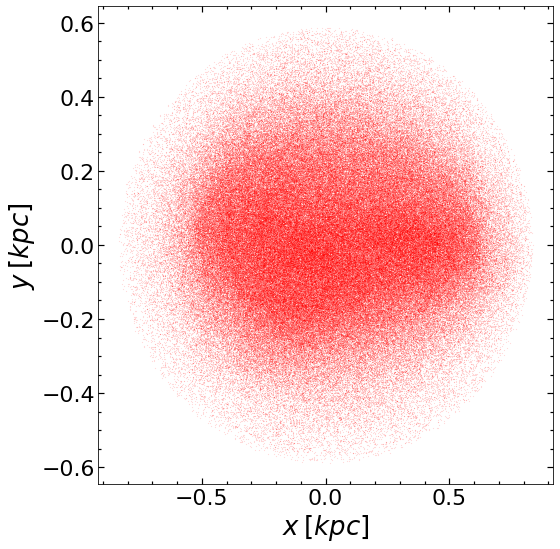

1.297434
225361


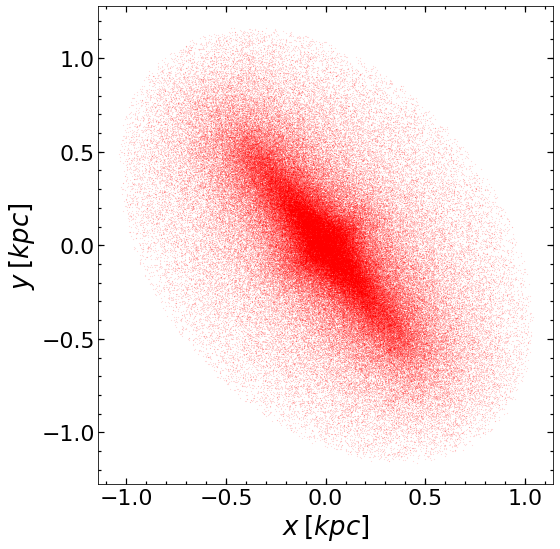

In [7]:
import pynbody
import rotation_mio as rot
import barstrength2 as strng
import tenform as ten
from numpy import linalg

path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'
s = pynbody.load(path + '1024/WMAP3.CLUES.HR.001024')
h = s.halos()

vector = np.array([1,2,3]) #!!!!!OJO!!! CAMBIE EL 4 POR UN 3!!!!!

vector2 = ('M31', 'MW', 'M33')
path2 = '/z/omarioni/Barras_GdGs/erebos/pyprogram/_data/'
path3 = '/z/omarioni/Barras_GdGs/Barras_Gs/_data/'

for i in range(0,2):
    M31_gs = np.loadtxt(path3 +str('%s'%vector2[i])+'_A2max_time.dat')
    phim_M31gs  = M31_gs[:,2][0]

    M31_gs = np.loadtxt(path3 +str('%s'%vector2[i])+'_lbarvstime.dat')
    lbar_M31gs = M31_gs[:,1][0]
    
    print lbar_M31gs
    
    h1 = h[vector[i]]
    
    cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')
    r200  = h1.properties['Rvir']
    aexp  = h1.properties['a']
    IDs   = h1.star['iord']
    tform = h1.star['tform'].in_units('Gyr')
    vel   = h1.star['vel'].in_units('km s**-1')
    mstr  = h1.star['mass'].in_units('Msol') 
    
    rgal = 0.15*r200

    xstr=((h1.star['pos'].in_units('kpc'))[:,0] - cen_pot[0])
    ystr=((h1.star['pos'].in_units('kpc'))[:,1] - cen_pot[1])
    zstr=((h1.star['pos'].in_units('kpc'))[:,2] - cen_pot[2])
     
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)    
    
    limit, = np.where(rstr<rgal)
    r_sort = np.sort(rstr[limit])      
    r_indice = np.argsort(rstr[limit])  

    Mc_str = cumsum(mstr[limit][r_indice])  
    Mgal = Mc_str[-1]  

    
   #-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    cincuenta, = np.where(razon < 0.5)

    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
#componentes de la velocidad del centro de masa
    veloc, = np.where(rstr < r50)
    
    v_x = vel[:,0]
    v_y = vel[:,1] 
    v_z = vel[:,2]
    
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn  = np.sqrt(xn**2 + yn**2 + zn**2)
     
    xx = xn*cos(phim_M31gs)+yn*sin(phim_M31gs)
    yy = xn*-sin(phim_M31gs)+yn*cos(phim_M31gs)
    zz = zn
    
    #----para lbar2--------------------------------------------------------------
    limit1,=np.where(rstr < lbar_M31gs)
    tensor = ten.tenf(xx[limit1], yy[limit1], zz[limit1])

    matriz = linalg.eig(tensor)
    autov  = matriz[0]

    asort  = np.sort(autov)

    a1 = asort[2]
    b1 = asort[1]
    c1 = asort[0]
    
    A1 = np.sqrt(a1)
    B1 = np.sqrt(b1)
    C1 = np.sqrt(c1)

    
#Definimos el tamaño de nuestro elipsoide
    aa=lbar_M31gs
    bb=(B1/A1)*lbar_M31gs
    cc=(C1/A1)*lbar_M31gs
    
#Hacemos la rotación de las coordenadas

    RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2) # formula del elipsoide
    
    mask, = np.where(RR<1) #seleccionamos las particulas dentro del elipsoide
    
    ID    = IDs[mask]
    tform = tform[mask]
    rn_z0 = rn[mask]
    
    print len(ID)
    
# Guargamos los parámetros en distintos archivos
# ----------------------------------------------------------------------------------
    datos = np.ndarray([len(ID),3])
    datos[:,0] = ID
    datos[:,1] = tform
    datos[:,2] = rn_z0

    np.savetxt('/z/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_part_barra.dat', 
               datos, fmt=('%15d' '%12.6f' '%12.6f'))
    
    
    #----------------------------------------------------------------------------------  
    
    fig=plt.figure(1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
#     ax.plot(xn,yn,'.', markersize=0.1, color='k')
    ax.plot(xn[mask],yn[mask],'.', markersize=0.1, color='r')
#     ax.set_xlim(-5,5)
#     ax.set_ylim(-5,5)
    ax.minorticks_on()
    ax.tick_params(labelsize=22)
    ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')  
    ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
    ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
    plt.show()

In [9]:
path2 = '/z/omarioni/Barras_GdGs/erebos/pyprogram/_data/'
path3 = '/z/omarioni/Barras_GdGs/Barras_Gs/_data/'

M31gs = np.loadtxt(path2 + 'M31_tform_particles.dat')
ID_M31 = M31gs[:,0]
r_M31  = M31gs[:,1]
tf_M31 = M31gs[:,2]

M31gs = np.loadtxt(path3 + 'M31_part_barra.dat')
Ids  = M31gs[:,0]


mask = np.isin(ID_M31, Ids)

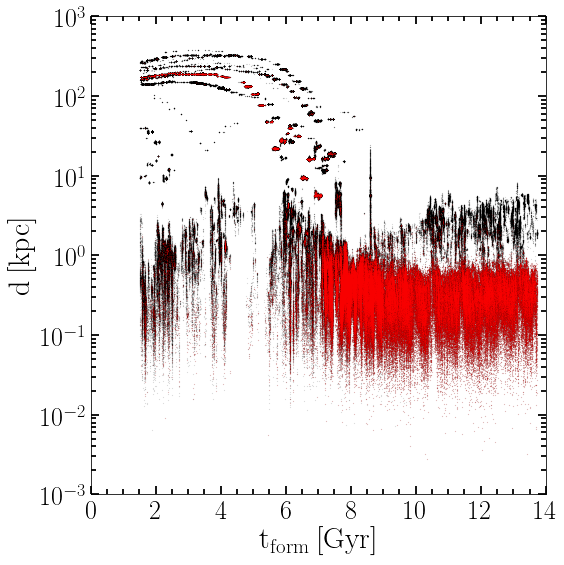

In [10]:
import matplotlib.pyplot as plt
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
fig.patch.set_facecolor('white')
ax.plot(tf_M31 ,r_M31,'.k', markersize=0.1)
ax.plot(tf_M31[mask] ,r_M31[mask],'.r', markersize=0.1)
ax.set_yscale('log')
ax.set_ylabel(r'$\mathrm{d\:[kpc]}$', fontsize=30)
ax.set_xlabel(r'$\mathrm{t_{form}\:[Gyr]}$',fontsize=30)
ax.set_xticks(range(0,15,2))
ax.set_ylim(10**-3,10**3)
ax.set_xlim(0,14)
ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/A2max_time.pdf', dpi = 100, xxbox_inches='tight')


plt.show()

In [11]:
path2 = '/z/omarioni/Barras_GdGs/erebos/pyprogram/_data/'
path3 = '/z/omarioni/Barras_GdGs/Barras_Gs/_data/'

MWgs = np.loadtxt(path2 + 'MW_tform_particles.dat')
ID_MW = MWgs[:,0]
r_MW  = MWgs[:,1]
tf_MW = MWgs[:,2]

MWgs = np.loadtxt(path3 + 'MW_part_barra.dat')
Ids  = MWgs[:,0]


mask = np.isin(ID_MW, Ids)

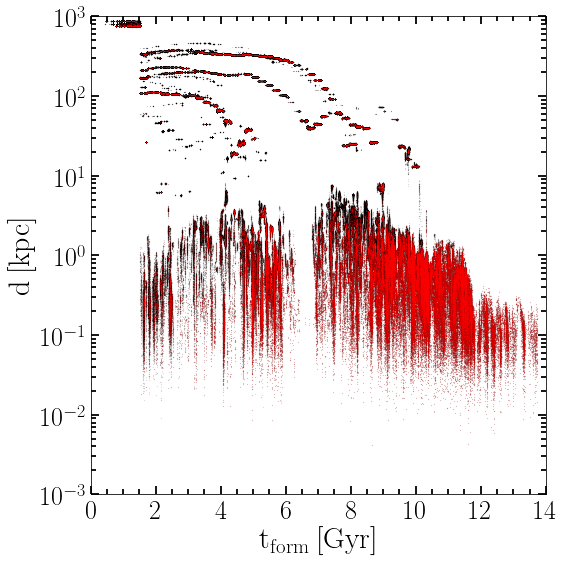

In [12]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
fig.patch.set_facecolor('white')
ax.plot(tf_MW ,r_MW,'.k', markersize=0.1)
ax.plot(tf_MW[mask] ,r_MW[mask],'.r', markersize=0.1)
ax.set_yscale('log')
ax.set_ylabel(r'$\mathrm{d\:[kpc]}$', fontsize=30)
ax.set_xlabel(r'$\mathrm{t_{form}\:[Gyr]}$',fontsize=30)
ax.set_xticks(range(0,15,2))
ax.set_ylim(10**-3,10**3)
ax.set_xlim(0,14)
ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/A2max_time.pdf', dpi = 100, xxbox_inches='tight')


plt.show()

In [11]:
path2 = '/z/omarioni/Barras_GdGs/erebos/pyprogram/_data/'

M33gs = np.loadtxt(path2 + 'M33_tform_particles.dat')
ID_M33 = M33gs[:,0]
r_M33  = M33gs[:,1]
tf_M33 = M33gs[:,2]

# M31gs = np.loadtxt(path2 + 'M31_part_barra.dat')
# Ids  = M31gs[:,0]


# mask = np.isin(ID_M31, Ids)

In [30]:
print len(ID_M33)

267820


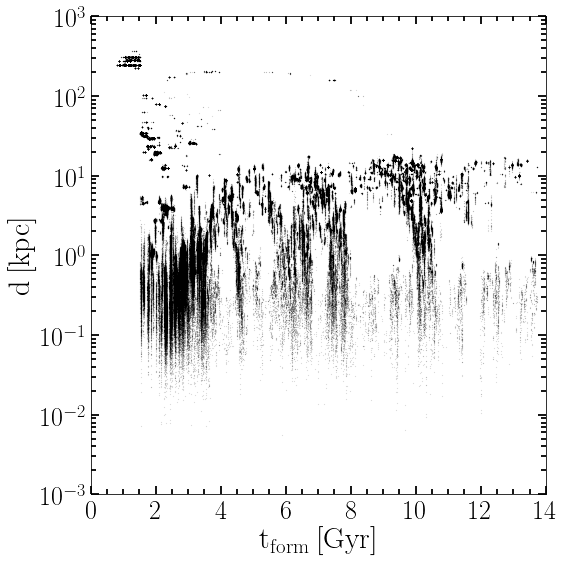

In [15]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
fig.patch.set_facecolor('white')

ax.plot(tf_M33 ,r_M33,'.k', markersize=0.1)
# ax.plot(tf_M33[mask] ,r_M31[mask],'.r', markersize=0.1)
ax.set_yscale('log')
ax.set_ylabel(r'$\mathrm{d\:[kpc]}$', fontsize=30)
ax.set_xlabel(r'$\mathrm{t_{form}\:[Gyr]}$',fontsize=30)
ax.set_xticks(range(0,15,2))
ax.set_ylim(10**-3,10**3)
ax.set_xlim(0,14)
ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/A2max_time.pdf', dpi = 100, xxbox_inches='tight')


plt.show()

In [17]:
path2 = '/z/omarioni/Barras_GdGs/erebos/pyprogram/_data/'
# file = np.loadtxt(path2 + 'M33_tform_z0.dat')
# ID    = file[:,0]
# rz0   = file[:,1]
# tform = file[:,2]

file = np.loadtxt(path2 + 'M31_tform_z0.dat')
ID2    = file[:,0]
rz02   = file[:,1]
tform2 = file[:,2]

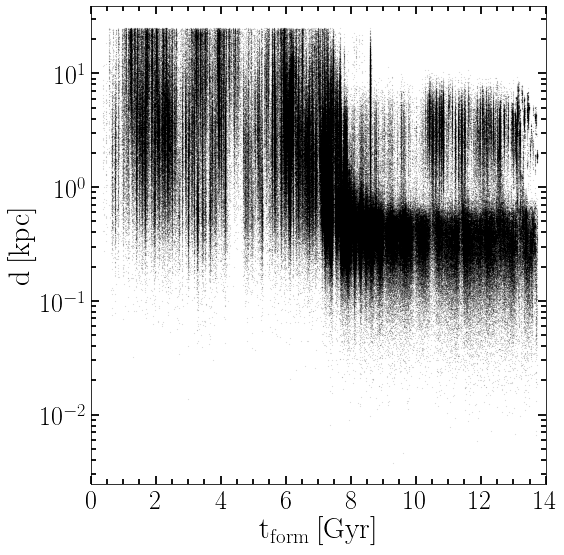

In [18]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)

# ax.plot(tform ,rz0,'.k', markersize=0.1)
ax.plot(tform2 ,rz02,'.k', markersize=0.1)

# ax.plot(tf_M33[mask] ,r_M31[mask],'.r', markersize=0.1)
ax.set_yscale('log')
ax.set_ylabel(r'$\mathrm{d\:[kpc]}$', fontsize=30)
ax.set_xlabel(r'$\mathrm{t_{form}\:[Gyr]}$',fontsize=30)
ax.set_xticks(range(0,15,2))
# ax.set_ylim(10**-3,10**3)
ax.set_xlim(0,14)
ax.minorticks_on()
ax.tick_params( labelsize=26)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/A2max_time.pdf', dpi = 100, xxbox_inches='tight')


plt.show()

In [20]:
snapshot = np.loadtxt('/z/omarioni/snapshots.txt', dtype='string') #SNAPSHOTS
isnap = snapshot[::-1]

In [21]:
print isnap

['1024' '1008' '0992' '0976' '0960' '0944' '0928' '0912' '0896' '0880'
 '0864' '0848' '0832' '0816' '0800' '0784' '0768' '0752' '0736' '0720'
 '0704' '0688' '0672' '0656' '0640' '0624' '0608' '0592' '0576' '0560'
 '0544' '0528' '0512' '0496' '0480' '0464' '0453' '0448' '0432' '0416'
 '0400' '0384' '0368' '0352' '0336' '0320' '0304' '0288' '0272' '0256'
 '0240' '0224' '0208' '0192' '0176' '0160' '0144' '0128' '0112' '0016']


In [1]:
import pynbody
path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/'

s = pynbody.load(path +'1024/WMAP3.CLUES.HR.001024')
        
# s.physical_units()

In [2]:
s.properties['time'].in_units('Gyr')

13.729565519987416

In [3]:
s.stars['tform'].max().in_units('Gyr')

SimArray(13.72960659, 'Gyr')

In [5]:
h = s.halos()

In [6]:
h1 = h[3]
h2 = h[4]

In [54]:
cen_pot1 = pynbody.analysis.halo.center(h1,mode='pot',retcen=True).in_units('kpc')
print cen_pot

[-10049.28773786    -43.49218148  -8869.93859435]


In [55]:
cen_pot2 = pynbody.analysis.halo.center(h2,mode='pot',retcen=True).in_units('kpc')
print cen_pot

[-10049.28773786    -43.49218148  -8869.93859435]


In [56]:
h1.dm['mass'].sum().in_units('Msol')

SimArray(2.3839239e+11, 'Msol')

In [57]:
h2.dm['mass'].sum().in_units('Msol')

SimArray(2.83823684e+11, 'Msol')

In [59]:
h1_pos = h1.star['pos'] - cen_pot1

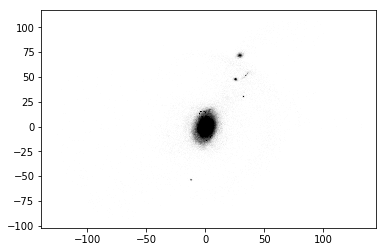

In [60]:
import matplotlib.pyplot as plt
plt.plot(h1_pos[:,0],h1_pos[:,1],'.k', markersize=0.01)

In [61]:
h2_pos = h2.star['pos'] - cen_pot2

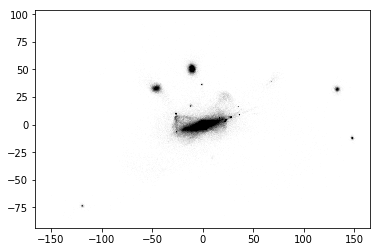

In [62]:
import matplotlib.pyplot as plt
plt.plot(h2_pos[:,0],h2_pos[:,1],'.k', markersize=0.01)

In [41]:
s2 = s['pos']-cen_pot1

In [7]:
pynbody.analysis.angmom.faceon(h1)

SimArray([[8.8052968e-07, 9.0710233e-07, 9.3367487e-07, ...,
           1.5023228e-06, 1.4765440e-06, 1.4507650e-06],
          [8.9018221e-07, 9.1627072e-07, 9.4235924e-07, ...,
           1.5238890e-06, 1.4978503e-06, 1.4718122e-06],
          [8.9983467e-07, 9.2543900e-07, 9.5104366e-07, ...,
           1.5454548e-06, 1.5191571e-06, 1.4928598e-06],
          ...,
          [3.1984823e-06, 3.1457878e-06, 3.0930921e-06, ...,
           8.2048848e-07, 7.9972267e-07, 7.7895686e-07],
          [3.2043736e-06, 3.1535110e-06, 3.1026475e-06, ...,
           7.9955413e-07, 7.7977097e-07, 7.5998776e-07],
          [3.2102644e-06, 3.1612337e-06, 3.1122040e-06, ...,
           7.7861961e-07, 7.5981905e-07, 7.4101877e-07]], dtype=float32, 'g cm**-2')

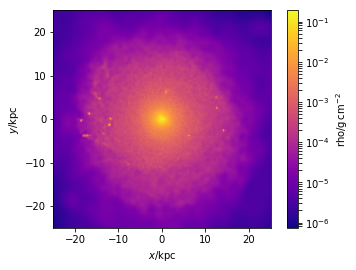

In [81]:
import pynbody.plot.sph as sph

sph.image(h1.s,qty="rho",units="g cm^-2",width=50,cmap="plasma")

In [8]:
pynbody.plot.stars.render(h1,width='20 kpc')

SimArray([[1.9857937e-06, 1.9885733e-06, 1.9913530e-06, ...,
           1.1708854e-06, 1.1761163e-06, 1.1813468e-06],
          [2.0070702e-06, 2.0101027e-06, 2.0131354e-06, ...,
           1.2250821e-06, 1.2291358e-06, 1.2331893e-06],
          [2.0283467e-06, 2.0316318e-06, 2.0349178e-06, ...,
           1.2792789e-06, 1.2821555e-06, 1.2850317e-06],
          ...,
          [8.9223926e-07, 9.0153691e-07, 9.1083433e-07, ...,
           1.3353090e-06, 1.3196957e-06, 1.3040825e-06],
          [8.8113751e-07, 8.9008773e-07, 8.9903779e-07, ...,
           1.3235599e-06, 1.3077693e-06, 1.2919789e-06],
          [8.7003593e-07, 8.7863839e-07, 8.8724096e-07, ...,
           1.3118106e-06, 1.2958432e-06, 1.2798753e-06]], dtype=float32, 'g cm**-2')

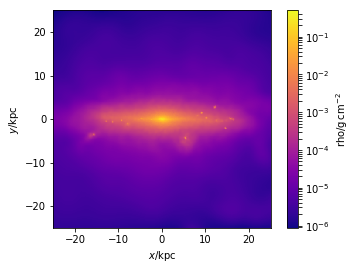

In [90]:
pynbody.analysis.angmom.sideon(h1)
import pynbody.plot.sph as sph
sph.image(h1.s,qty="rho",units="g cm^-2",width=50,cmap="plasma")

In [87]:
pynbody.analysis.angmom.faceon(h2)

SimArray([[6.2613126e-06, 6.3630532e-06, 6.4647938e-06, ...,
           1.8573415e-05, 1.8623825e-05, 1.8674236e-05],
          [6.3677862e-06, 6.4649789e-06, 6.5621712e-06, ...,
           1.8807015e-05, 1.8850584e-05, 1.8894141e-05],
          [6.4742594e-06, 6.5669051e-06, 6.6595517e-06, ...,
           1.9040606e-05, 1.9077330e-05, 1.9114048e-05],
          ...,
          [3.9831725e-06, 3.9940287e-06, 4.0048853e-06, ...,
           2.9594197e-05, 2.6551872e-05, 2.3509545e-05],
          [3.9579581e-06, 3.9692700e-06, 3.9805818e-06, ...,
           3.0810777e-05, 2.7587237e-05, 2.4363697e-05],
          [3.9327438e-06, 3.9445104e-06, 3.9562792e-06, ...,
           3.2027358e-05, 2.8622600e-05, 2.5217843e-05]], dtype=float32, 'g cm**-2')

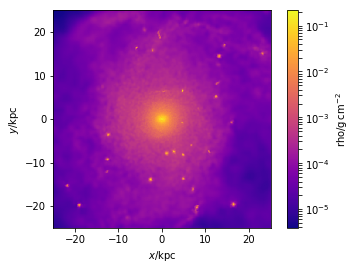

In [88]:
import pynbody.plot.sph as sph
sph.image(h2.s,qty="rho",units="g cm^-2",width=50,cmap="plasma")

SimArray([[4.8901569e-07, 4.8980439e-07, 4.9059310e-07, ...,
           3.0830038e-06, 3.1034035e-06, 3.1238035e-06],
          [4.9447311e-07, 4.9551943e-07, 4.9656592e-07, ...,
           3.0829069e-06, 3.1033837e-06, 3.1238599e-06],
          [4.9993054e-07, 5.0123452e-07, 5.0253863e-07, ...,
           3.0828096e-06, 3.1033633e-06, 3.1239160e-06],
          ...,
          [2.2680165e-06, 2.2566232e-06, 2.2452309e-06, ...,
           2.3872551e-06, 2.4134367e-06, 2.4396177e-06],
          [2.2612558e-06, 2.2499075e-06, 2.2385589e-06, ...,
           2.2083696e-06, 2.2312913e-06, 2.2542140e-06],
          [2.2544946e-06, 2.2431911e-06, 2.2318877e-06, ...,
           2.0294829e-06, 2.0491459e-06, 2.0688092e-06]], dtype=float32, 'g cm**-2')

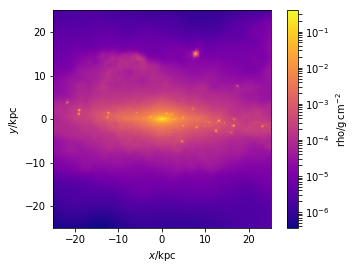

In [89]:
pynbody.analysis.angmom.sideon(h2)
import pynbody.plot.sph as sph
sph.image(h2.s,qty="rho",units="g cm^-2",width=50,cmap="plasma")

SimArray([[4.0471887e-06, 4.0824539e-06, 4.1177209e-06, ...,
           5.3302997e-06, 5.3139584e-06, 5.2976175e-06],
          [4.0440336e-06, 4.0799769e-06, 4.1159196e-06, ...,
           5.3478225e-06, 5.3322119e-06, 5.3166027e-06],
          [4.0408777e-06, 4.0774989e-06, 4.1141202e-06, ...,
           5.3653434e-06, 5.3504659e-06, 5.3355893e-06],
          ...,
          [3.9105744e-06, 3.9794722e-06, 4.0483696e-06, ...,
           6.1019718e-06, 6.0131774e-06, 5.9243821e-06],
          [3.8700041e-06, 3.9380907e-06, 4.0061773e-06, ...,
           6.0469265e-06, 5.9594599e-06, 5.8719938e-06],
          [3.8294352e-06, 3.8967096e-06, 3.9639831e-06, ...,
           5.9918789e-06, 5.9057438e-06, 5.8196078e-06]], dtype=float32, 'g cm**-2')

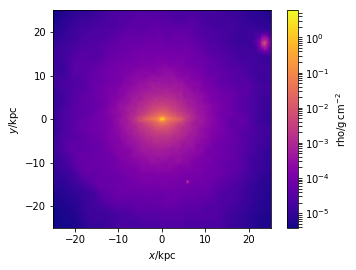

In [91]:
pynbody.analysis.angmom.sideon(h[1])
import pynbody.plot.sph as sph
sph.image(h[1].s,qty="rho",units="g cm^-2",width=50,cmap="plasma")

SimArray([[0.00609151, 0.00607231, 0.0060531 , ..., 0.00577927,
           0.00575287, 0.00572647],
          [0.00614887, 0.00612871, 0.00610855, ..., 0.00582126,
           0.00578727, 0.00575329],
          [0.00620622, 0.00618511, 0.006164  , ..., 0.00586325,
           0.00582168, 0.00578012],
          ...,
          [0.00553967, 0.00561756, 0.00569545, ..., 0.00638987,
           0.00627738, 0.0061649 ],
          [0.00555458, 0.0056413 , 0.00572802, ..., 0.00638456,
           0.00627711, 0.00616965],
          [0.00556948, 0.00566503, 0.00576059, ..., 0.00637925,
           0.00627683, 0.00617441]], dtype=float32, 'g cm**-2')

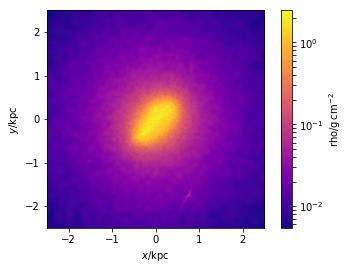

In [95]:
pynbody.analysis.angmom.faceon(h[1])
import pynbody.plot.sph as sph
sph.image(h[1].s,qty="rho",units="g cm^-2",width=5,cmap="plasma")

SimArray([[3.0083477e-06, 2.9992502e-06, 2.9901512e-06, ...,
           2.6664043e-06, 2.6602113e-06, 2.6540185e-06],
          [3.0261656e-06, 3.0175402e-06, 3.0089161e-06, ...,
           2.7234671e-06, 2.7153737e-06, 2.7072804e-06],
          [3.0439819e-06, 3.0358310e-06, 3.0276803e-06, ...,
           2.7805308e-06, 2.7705362e-06, 2.7605411e-06],
          ...,
          [4.2725296e-06, 4.2801853e-06, 4.2878414e-06, ...,
           3.1529030e-06, 3.1432871e-06, 3.1336708e-06],
          [4.1294711e-06, 4.1357039e-06, 4.1419366e-06, ...,
           3.1075313e-06, 3.0983485e-06, 3.0891663e-06],
          [3.9864135e-06, 3.9912229e-06, 3.9960319e-06, ...,
           3.0621600e-06, 3.0534111e-06, 3.0446622e-06]], dtype=float32, 'g cm**-2')

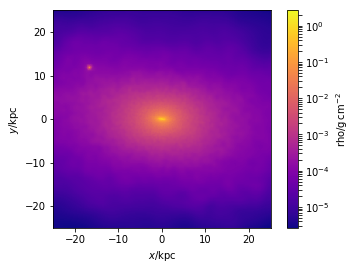

In [92]:
pynbody.analysis.angmom.sideon(h[2])
import pynbody.plot.sph as sph
sph.image(h[2].s,qty="rho",units="g cm^-2",width=50,cmap="plasma")

SimArray([[7.74688579e-06, 7.82929328e-06, 7.91169805e-06, ...,
           1.26132154e-05, 1.24563403e-05, 1.22994697e-05],
          [7.77091100e-06, 7.85033353e-06, 7.92975698e-06, ...,
           1.28841320e-05, 1.27231751e-05, 1.25622246e-05],
          [7.79493803e-06, 7.87137560e-06, 7.94781499e-06, ...,
           1.31550496e-05, 1.29900118e-05, 1.28249758e-05],
          ...,
          [1.41507044e-05, 1.42129984e-05, 1.42752924e-05, ...,
           1.03392449e-05, 1.02709773e-05, 1.02027079e-05],
          [1.40951070e-05, 1.41655637e-05, 1.42360204e-05, ...,
           1.05062772e-05, 1.04335795e-05, 1.03608827e-05],
          [1.40395086e-05, 1.41181308e-05, 1.41967521e-05, ...,
           1.06733096e-05, 1.05961853e-05, 1.05190566e-05]], dtype=float32, 'g cm**-2')

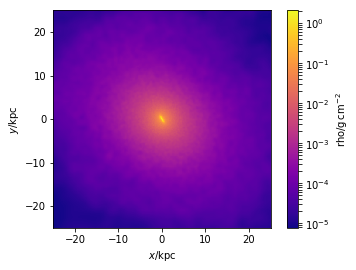

In [94]:
pynbody.analysis.angmom.faceon(h[2])
import pynbody.plot.sph as sph
sph.image(h[2].s,qty="rho",units="g cm^-2",width=50,cmap="plasma")